In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from AccidentInput import file_inputl, combine_data
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os

# Define directories
traindir = "C:/Users/jgh6ds/Desktop/Independent/Sessions 2-5 Data and Visualization/TrainData"
sourcedir = "C:/Users/jgh6ds/Desktop/Independent/Sessions 6-8 PCA"

acts = file_inputl(traindir)
comvar = set(acts[0].columns).intersection(set(acts[7].columns))
totacts = combine_data(acts, list(comvar))

# Get dimensions of the combined dataframe
print(totacts.shape)

(65465, 145)


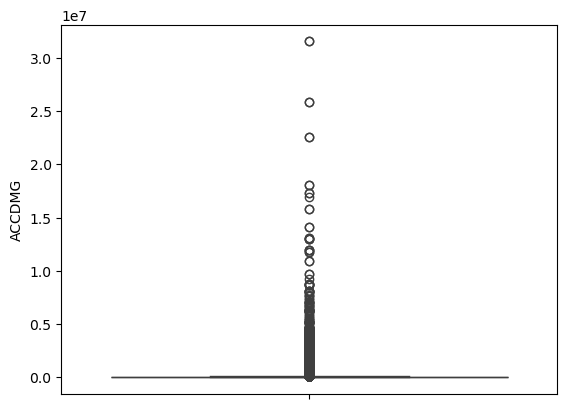

In [3]:
# For ACCDMG
sns.boxplot(y='ACCDMG', data=totacts)
plt.show()

# Find the upper whisker value
upper = totacts['ACCDMG'].quantile(0.75) + 1.5 * (totacts['ACCDMG'].quantile(0.75) - totacts['ACCDMG'].quantile(0.25))
xdmg = totacts[totacts['ACCDMG'] > upper]

In [4]:
xdmg['Casualties'] = xdmg['TOTINJ'] + xdmg['TOTKLD']

# Investigate extremes among the extremes
extremes = xdmg[xdmg['ACCDMG'] > 15e6]
print(extremes)


       TIMEMIN  CONDUCTR                                             NARR12  \
1932        48       NaN  C WATER INTRUSION INTO THE REMAINDER OF THE PA...   
42515        8       1.0                                                NaN   
42531        8       1.0                                                NaN   
47907       20       0.0                                                NaN   
47964       20       1.0                                                NaN   
51337       21       1.0                                                NaN   
51421       21       1.0                                                NaN   
52371       33       2.0                                                NaN   
52379       33       0.0                                                NaN   
55256       27       2.0                                                NaN   
57020       27       1.0                                                NaN   
63316       10       0.0                            

In [5]:
xdmg = xdmg.drop(xdmg.index[184])  # Adjusted for 0-based index

In [6]:
xdmgnd = xdmg.drop_duplicates(subset=['INCDTNO', 'YEAR', 'MONTH', 'DAY', 'TIMEHR', 'TIMEMIN'])
xdmgnd.reset_index(drop=True, inplace=True)

In [7]:
pca = PCA()
features = xdmgnd[['CARSDMG', 'EQPDMG', 'TRKDMG', 'ACCDMG', 'TOTKLD', 'TOTINJ']]
x = StandardScaler().fit_transform(features)
xdmgnd_pca = pca.fit_transform(x)

# Explained variance
print(pca.explained_variance_ratio_)

[0.37452463 0.18576837 0.1660365  0.13151695 0.10955544 0.03259811]


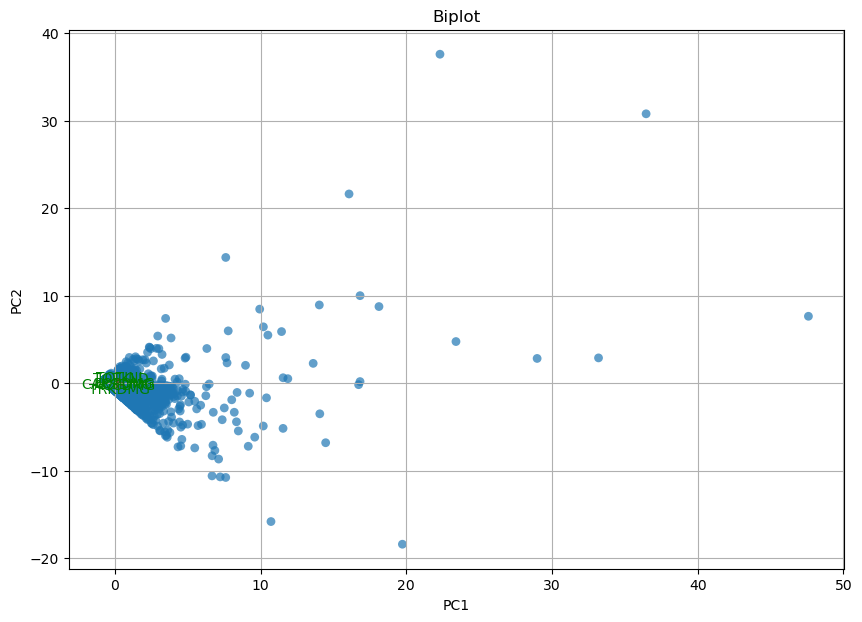

In [8]:
def biplot(pca, x):
    plt.figure(figsize=(10, 7))
    plt.scatter(x[:, 0], x[:, 1], edgecolor='none', alpha=0.7, s=40)
    for i, (x1, y1) in enumerate(zip(pca.components_[0], pca.components_[1])):
        plt.arrow(0, 0, x1, y1, color='r', alpha=0.5)
        plt.text(x1 * 1.15, y1 * 1.15, features.columns[i], color='g', ha='center', va='center')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Biplot')
    plt.grid(True)
    plt.show()

biplot(pca, xdmgnd_pca)

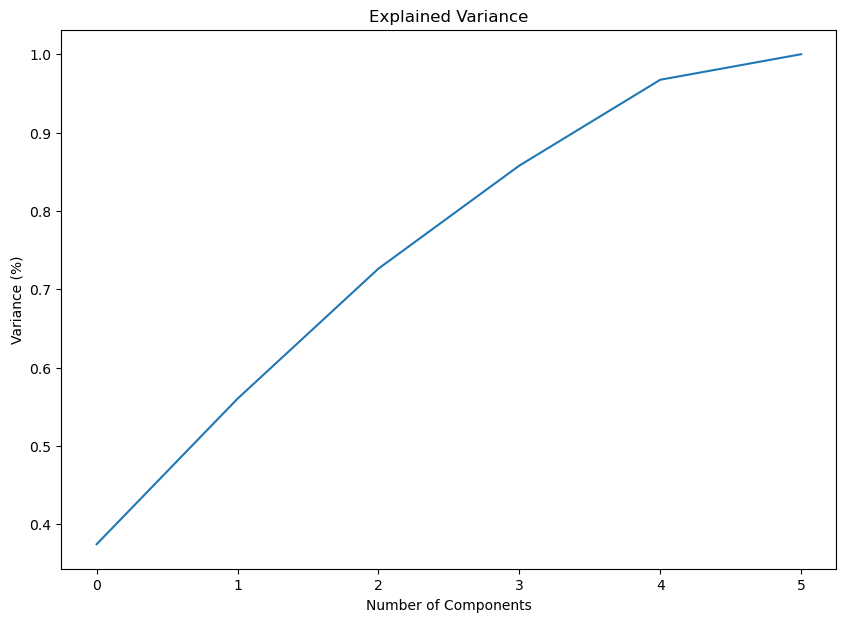

In [11]:
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()


In [12]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=features.columns)
print(loadings)

              PC1       PC2       PC3       PC4       PC5       PC6
CARSDMG  0.103900 -0.096923  0.973806 -0.057056  0.164291  0.035586
EQPDMG   0.575315  0.010522  0.009820 -0.311414 -0.382721 -0.652190
TRKDMG   0.298379 -0.642195 -0.129827  0.495675  0.425061 -0.235223
ACCDMG   0.588195 -0.238101 -0.082355 -0.145517 -0.230472  0.718512
TOTKLD   0.373527  0.482929 -0.132068 -0.254943  0.737725  0.024118
TOTINJ   0.289295  0.536813  0.102599  0.753592 -0.220229  0.034804


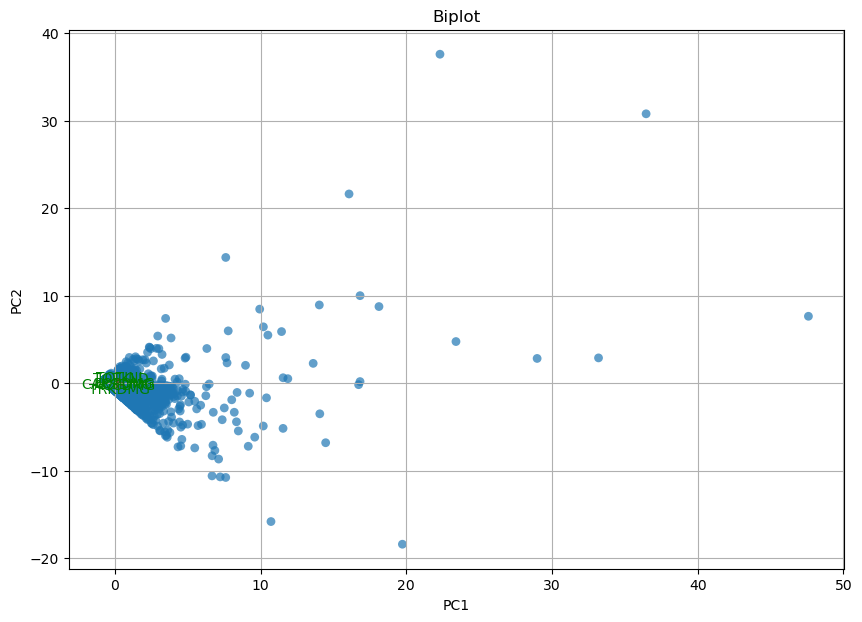

In [13]:
pca_corr = PCA()
x_scaled = StandardScaler().fit_transform(features)
xdmgnd_pca_corr = pca_corr.fit_transform(x_scaled)

# Biplot for correlation matrix
biplot(pca_corr, xdmgnd_pca_corr)

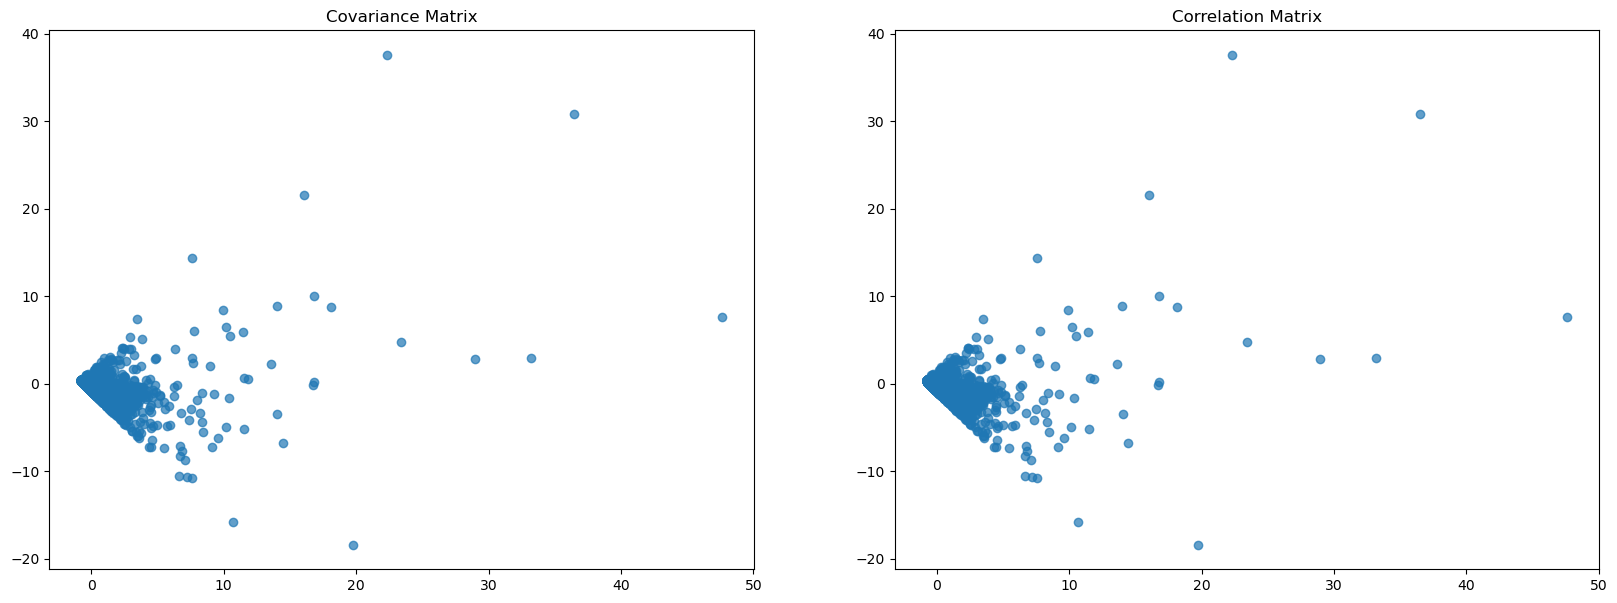

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1.scatter(xdmgnd_pca[:, 0], xdmgnd_pca[:, 1], alpha=0.7)
ax1.set_title('Covariance Matrix')
ax2.scatter(xdmgnd_pca_corr[:, 0], xdmgnd_pca_corr[:, 1], alpha=0.7)
ax2.set_title('Correlation Matrix')
plt.show()

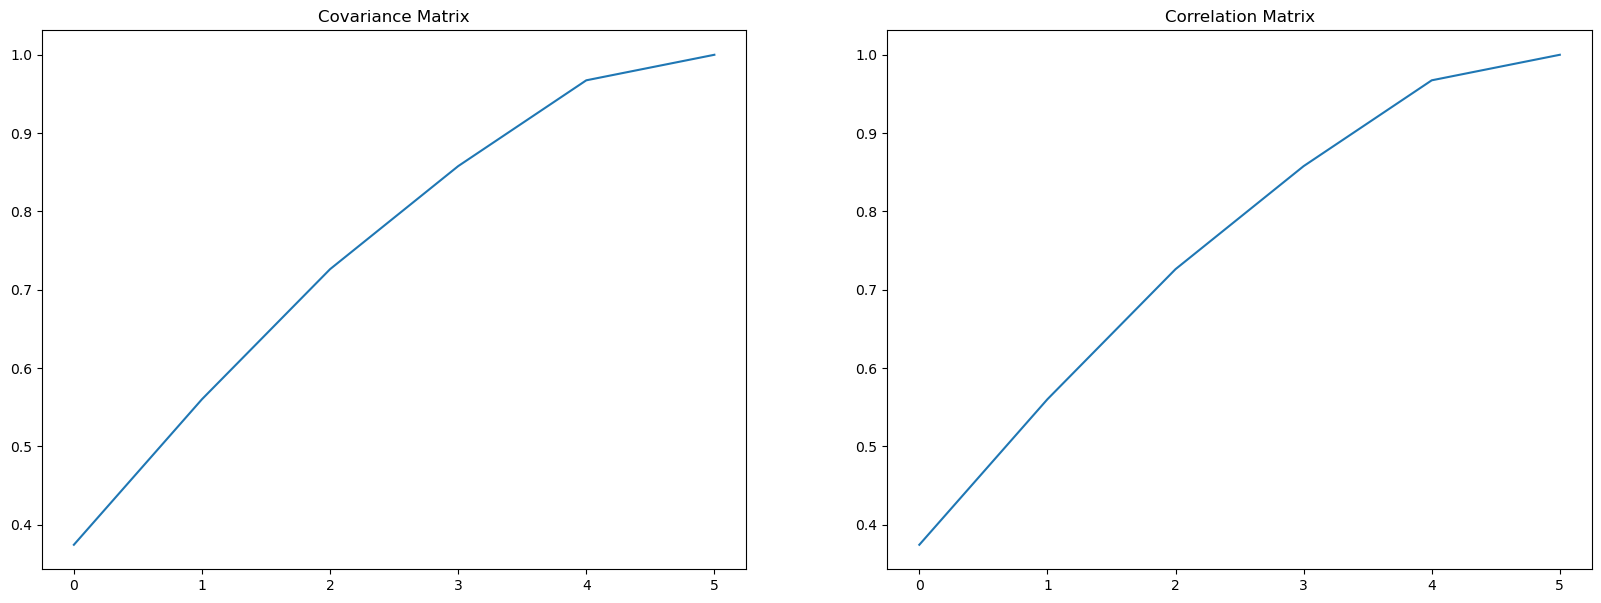

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# Covariance matrix
ax1.plot(np.cumsum(pca.explained_variance_ratio_))
ax1.set_title('Covariance Matrix')

# Correlation matrix
ax2.plot(np.cumsum(pca_corr.explained_variance_ratio_))
ax2.set_title('Correlation Matrix')

plt.show()


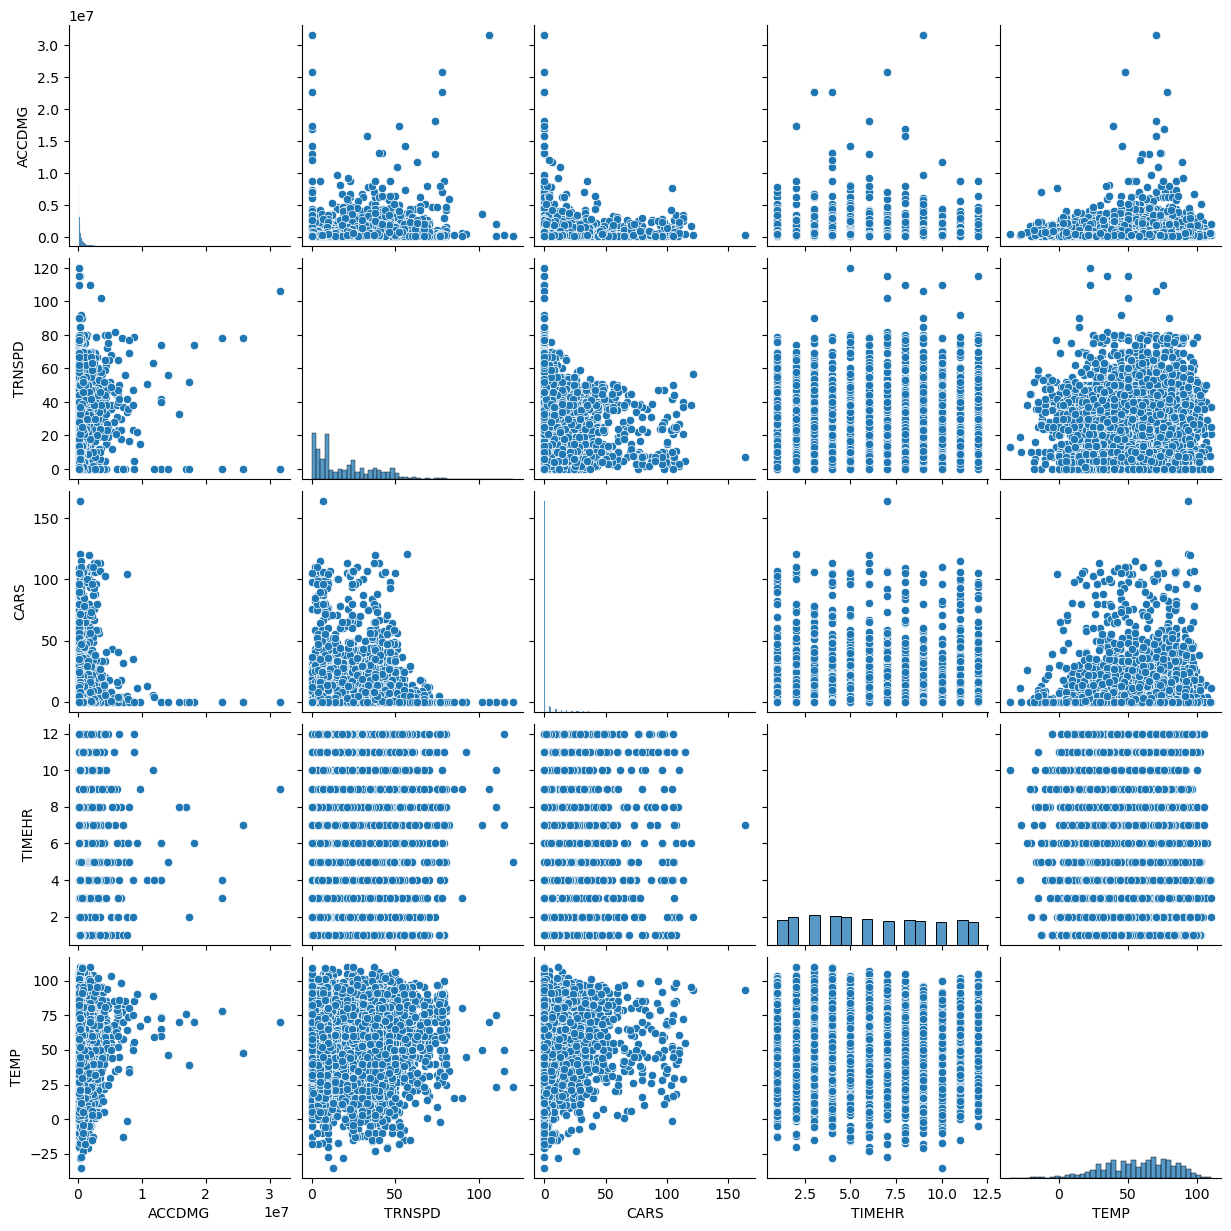

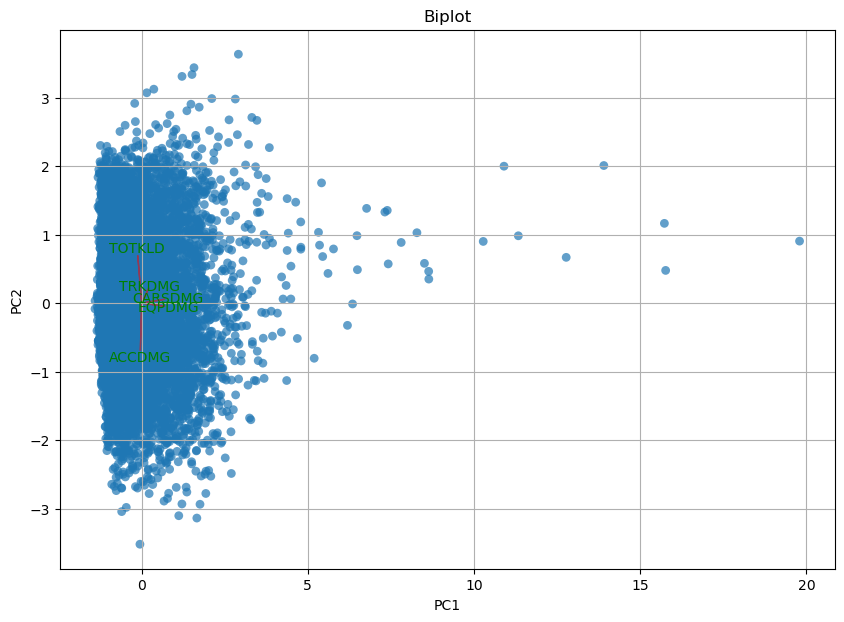

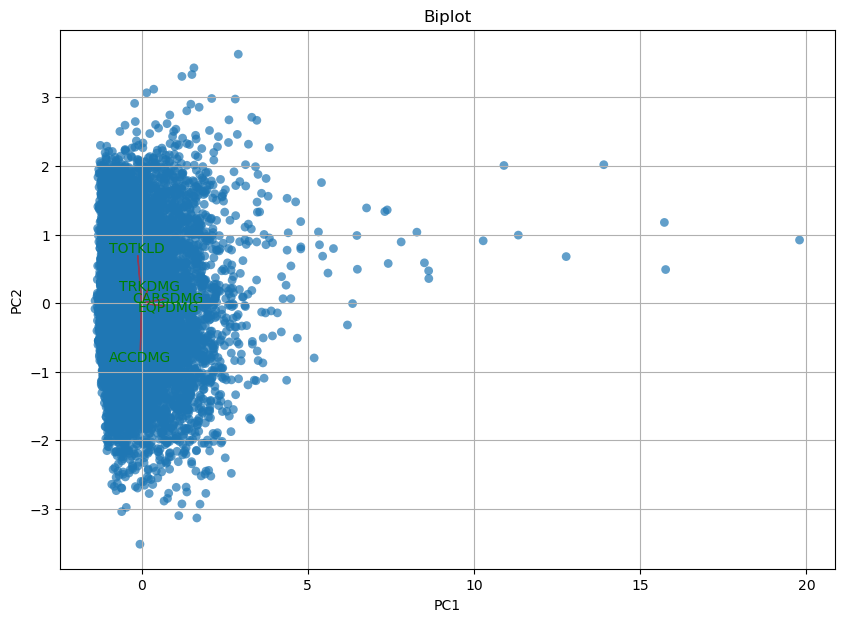

In [16]:
# Scatter plot matrix
sns.pairplot(xdmgnd[['ACCDMG', 'TRNSPD', 'CARS', 'TIMEHR', 'TEMP']])
plt.show()

# PCA on predictors
pred_features = xdmgnd[['ACCDMG', 'TRNSPD', 'CARS', 'TIMEHR', 'TEMP']]
pred_pca = PCA()
x_pred = StandardScaler().fit_transform(pred_features)
pred_pca_transformed = pred_pca.fit_transform(x_pred)

biplot(pred_pca, pred_pca_transformed)

# Remove outlier and repeat PCA
xdmgnd_no_outlier = xdmgnd.drop(index=5288)  # Adjusted for 0-based index
x_pred_no_outlier = StandardScaler().fit_transform(xdmgnd_no_outlier[['ACCDMG', 'TRNSPD', 'CARS', 'TIMEHR', 'TEMP']])
pred_pca_no_outlier = pred_pca.fit_transform(x_pred_no_outlier)

biplot(pred_pca, pred_pca_no_outlier)
